In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data/avg_data/Comparison_Results_with_Carbon.xlsx')

print(data.head())

   Time  DPSO_Service_Time  TabuSearch_Service_Time  DPSO_Carbon  \
0    20              4.796                    4.796       0.0323   
1    21              4.166                    4.083       0.0301   
2    22              3.797                    3.671       0.0287   
3    23              3.596                    3.454       0.0279   
4    24              3.482                    3.324       0.0278   

   TabuSearch_Carbon  
0             0.0323  
1             0.0303  
2             0.0290  
3             0.0283  
4             0.0282  


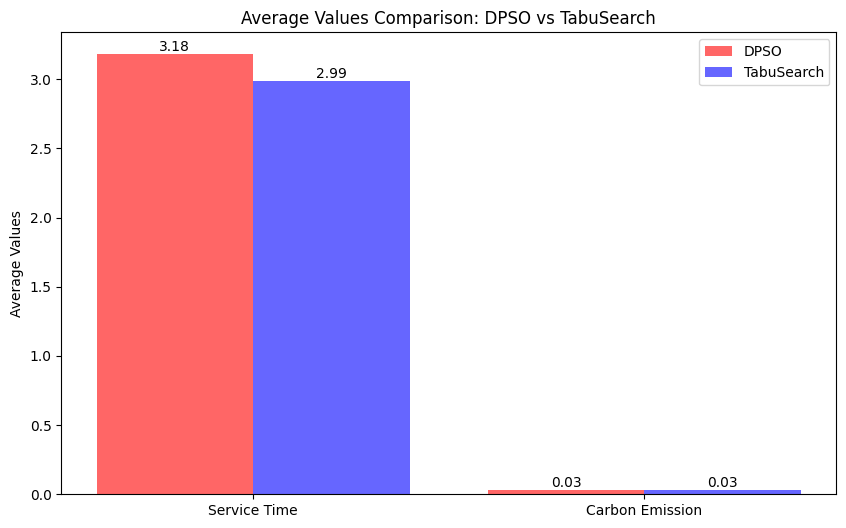

In [8]:
average_service_time_dspo = data["DPSO_Service_Time"].mean()
average_service_time_tabu = data["TabuSearch_Service_Time"].mean()
average_carbon_dspo = data["DPSO_Carbon"].mean()
average_carbon_tabu = data["TabuSearch_Carbon"].mean()

averages = pd.DataFrame({
    "Metric": ["Service Time", "Carbon Emission"],
    "DPSO": [average_service_time_dspo, average_carbon_dspo],
    "TabuSearch": [average_service_time_tabu, average_carbon_tabu]
})

plt.figure(figsize=(10, 6))
x_labels = averages["Metric"]
dspo_values = averages["DPSO"]
tabu_values = averages["TabuSearch"]

x = range(len(x_labels))
bar1 = plt.bar(x, dspo_values, color='red', alpha=0.6, width=0.4, label="DPSO", align='center')
bar2 = plt.bar([i + 0.4 for i in x], tabu_values, color='blue', alpha=0.6, width=0.4, label="TabuSearch", align='center')

for bar, value in zip(bar1, dspo_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom')
for bar, value in zip(bar2, tabu_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom')

plt.xticks([i + 0.2 for i in x], x_labels)
plt.ylabel("Average Values")
plt.title("Average Values Comparison: DPSO vs TabuSearch")
plt.legend()
plt.show()

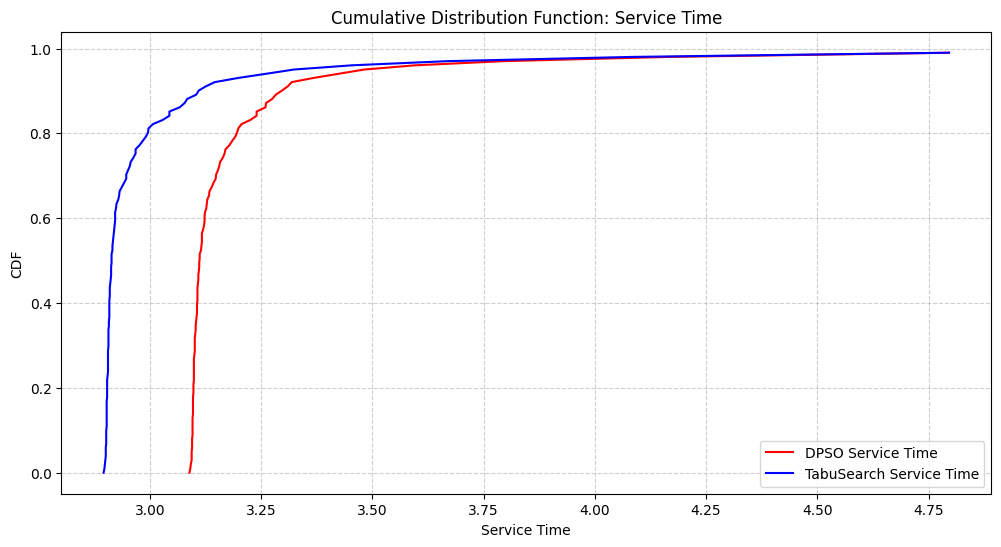

In [5]:
plt.figure(figsize=(12, 6))
for metric, color, label in [("DPSO_Service_Time", "red", "DPSO Service Time"),
                             ("TabuSearch_Service_Time", "blue", "TabuSearch Service Time")]:
    sorted_data = sorted(data[metric])
    cdf = [i / len(sorted_data) for i in range(len(sorted_data))]
    plt.plot(sorted_data, cdf, color=color, label=label)

plt.xlabel("Service Time")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function: Service Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

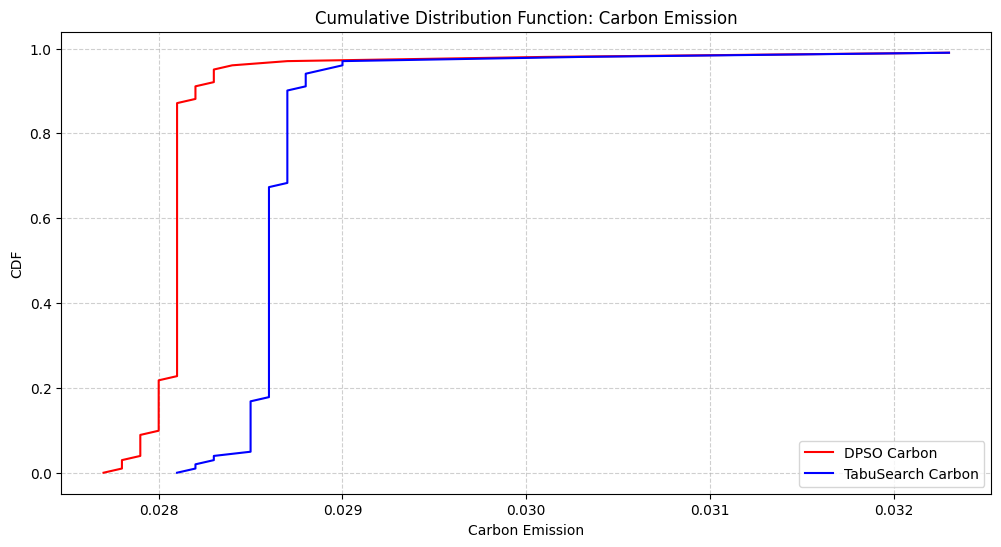

In [6]:
plt.figure(figsize=(12, 6))
for metric, color, label in [("DPSO_Carbon", "red", "DPSO Carbon"),
                             ("TabuSearch_Carbon", "blue", "TabuSearch Carbon")]:
    sorted_data = sorted(data[metric])
    cdf = [i / len(sorted_data) for i in range(len(sorted_data))]
    plt.plot(sorted_data, cdf, color=color, label=label)

plt.xlabel("Carbon Emission")
plt.ylabel("CDF")
plt.title("Cumulative Distribution Function: Carbon Emission")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

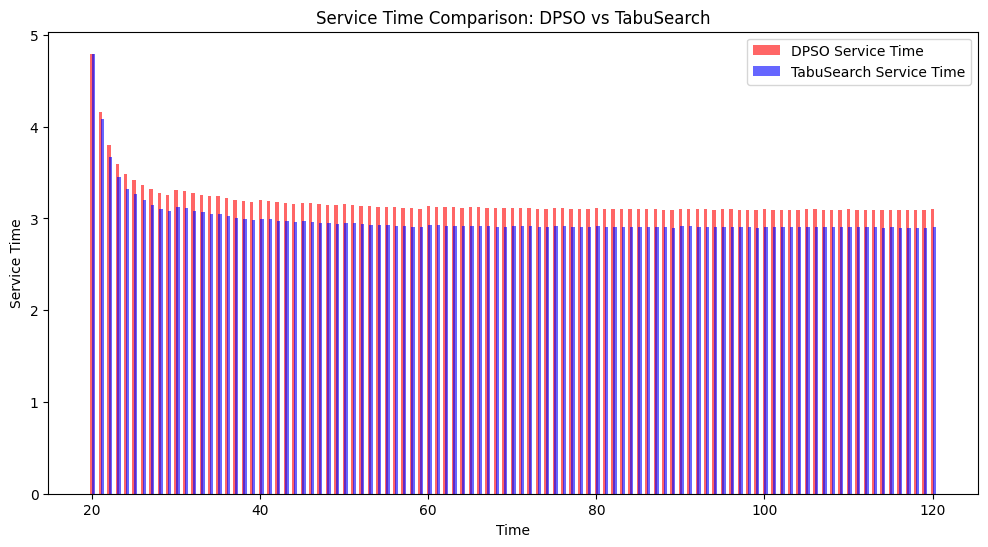

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(data["Time"], data["DPSO_Service_Time"], color='red', alpha=0.6, label="DPSO Service Time", width=0.4, align='center')
plt.bar(data["Time"], data["TabuSearch_Service_Time"], color='blue', alpha=0.6, label="TabuSearch Service Time", width=0.4, align='edge')
plt.xlabel("Time")
plt.ylabel("Service Time")
plt.title("Service Time Comparison: DPSO vs TabuSearch")
plt.legend()
plt.show()


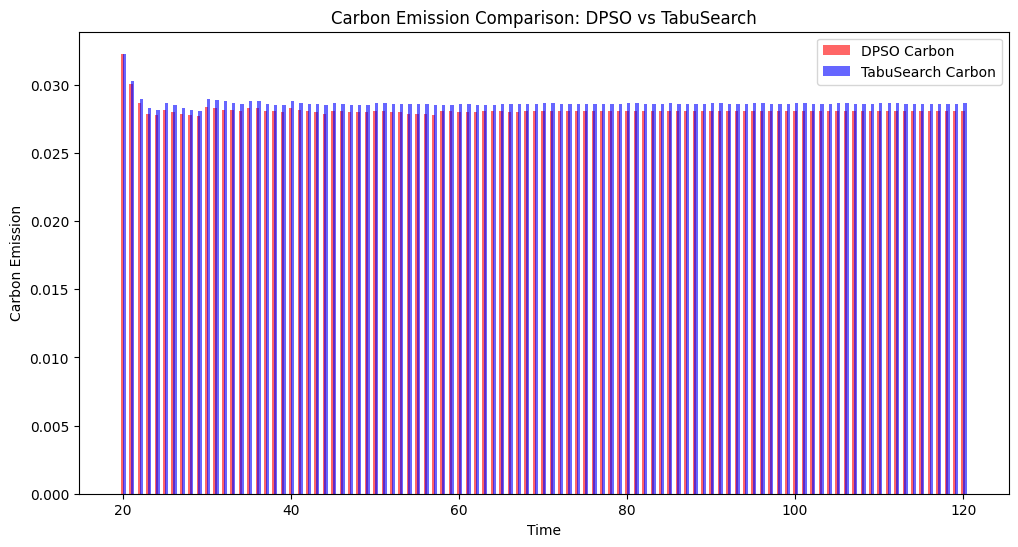

In [9]:
# Plotting a bar chart for Carbon comparison
plt.figure(figsize=(12, 6))
plt.bar(data["Time"], data["DPSO_Carbon"], color='red', alpha=0.6, label="DPSO Carbon", width=0.4, align='center')
plt.bar(data["Time"], data["TabuSearch_Carbon"], color='blue', alpha=0.6, label="TabuSearch Carbon", width=0.4, align='edge')
plt.xlabel("Time")
plt.ylabel("Carbon Emission")
plt.title("Carbon Emission Comparison: DPSO vs TabuSearch")
plt.legend()
plt.show()

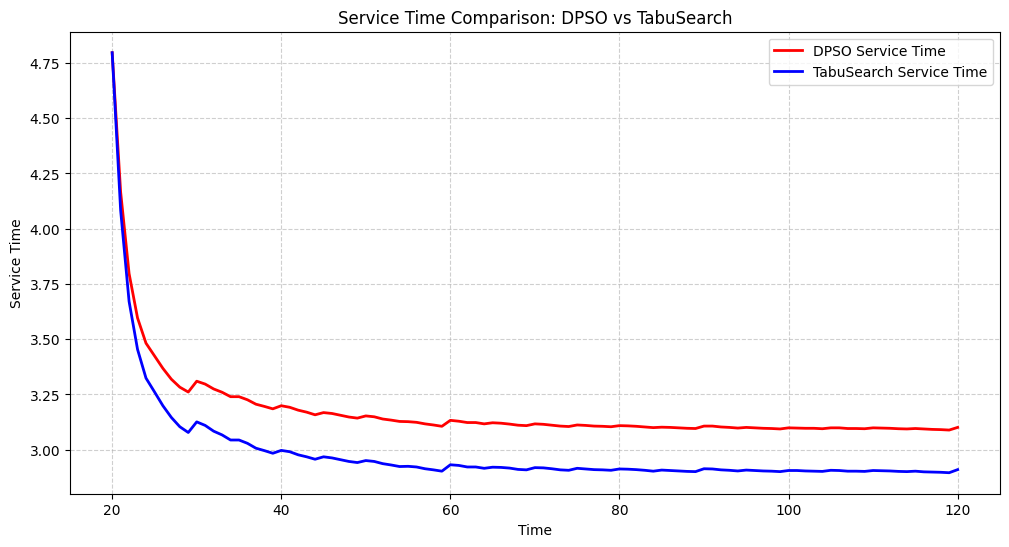

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data["Time"], data["DPSO_Service_Time"], color='red', label="DPSO Service Time", linewidth=2)
plt.plot(data["Time"], data["TabuSearch_Service_Time"], color='blue', label="TabuSearch Service Time", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Service Time")
plt.title("Service Time Comparison: DPSO vs TabuSearch")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

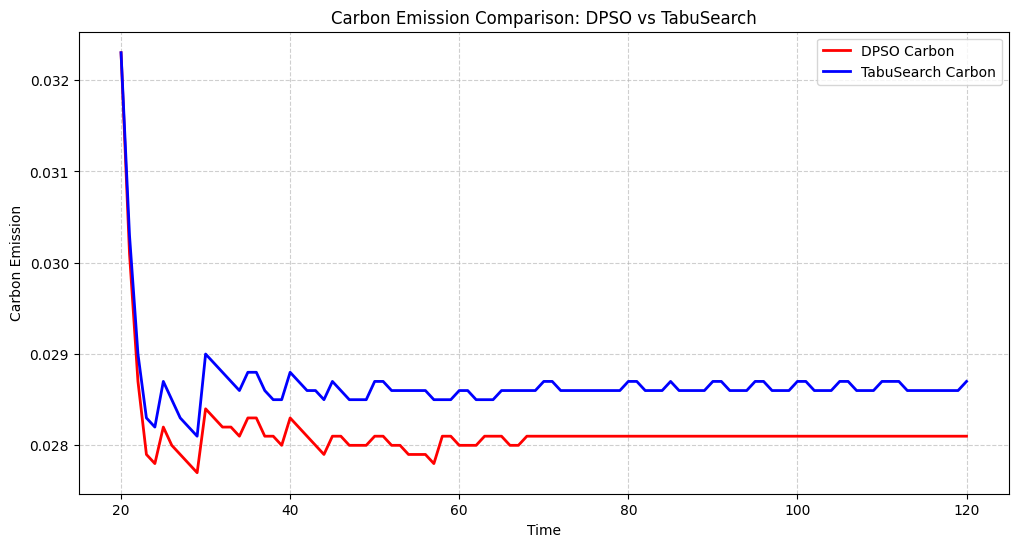

In [11]:
# Carbon comparison
plt.figure(figsize=(12, 6))
plt.plot(data["Time"], data["DPSO_Carbon"], color='red', label="DPSO Carbon", linewidth=2)
plt.plot(data["Time"], data["TabuSearch_Carbon"], color='blue', label="TabuSearch Carbon", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Carbon Emission")
plt.title("Carbon Emission Comparison: DPSO vs TabuSearch")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Using 100 records
DPSO is slightly better than TabuSearch, as it demonstrates:
- A consistent and statistically significant reduction in both Service Time and Carbon Emissions.
- A better slope for Carbon Emission reduction over time.

TabuSearch performs similarly in Service Time but lags in Carbon Emission improvements. Thus, DPSO is the preferred algorithm based on these data.